## EDA

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [3]:

df = pd.read_csv('disease.csv')


# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())



First 5 rows of the dataset:
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0      

In [4]:
# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
None


In [5]:

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [6]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())
# Count of each disease
print("\nCount of each disease in the dataset:")
print(df['prognosis'].value_counts())




Summary statistics:
           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4962.000000  4962.000000           4962.000000          4962.000000   
mean      0.138049     0.160016              0.021967             0.045143   
std       0.344986     0.366658              0.146590             0.207639   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4962.000000  4962.000000  4962.000000   4962.000000  4962.000000   
mean      0.021967     0.162233     0.139057      0.045143     0.045143   
std       0.146590     0.368702     0.346041      0

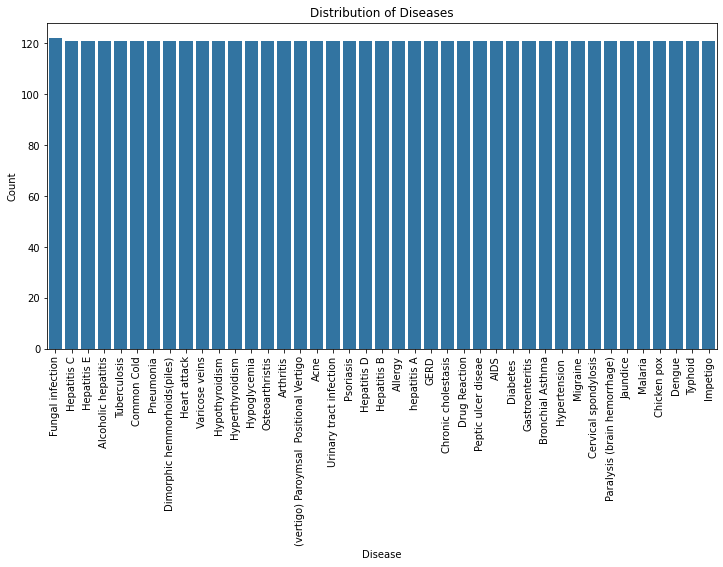

In [18]:
# Visualize the distribution of diseases
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='prognosis', order=df['prognosis'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Diseases')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()



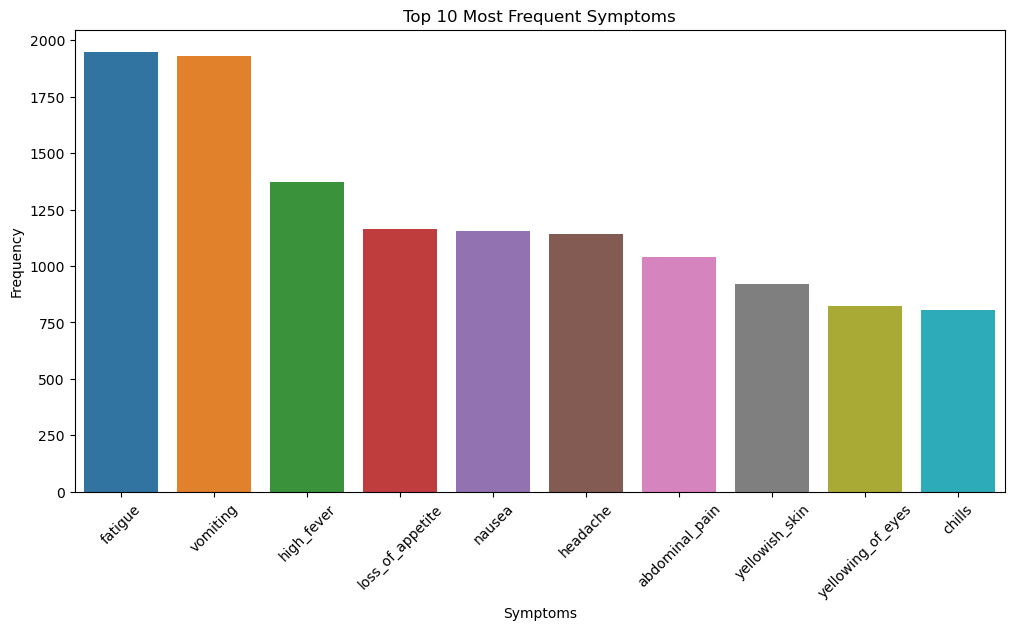

In [7]:
# Distribution of Symptoms (Top 10 Symptoms)
symptom_counts = df.drop(columns=['prognosis']).sum().sort_values(ascending=False)
top_symptoms = symptom_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_symptoms.index, y=top_symptoms.values)
plt.title('Top 10 Most Frequent Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



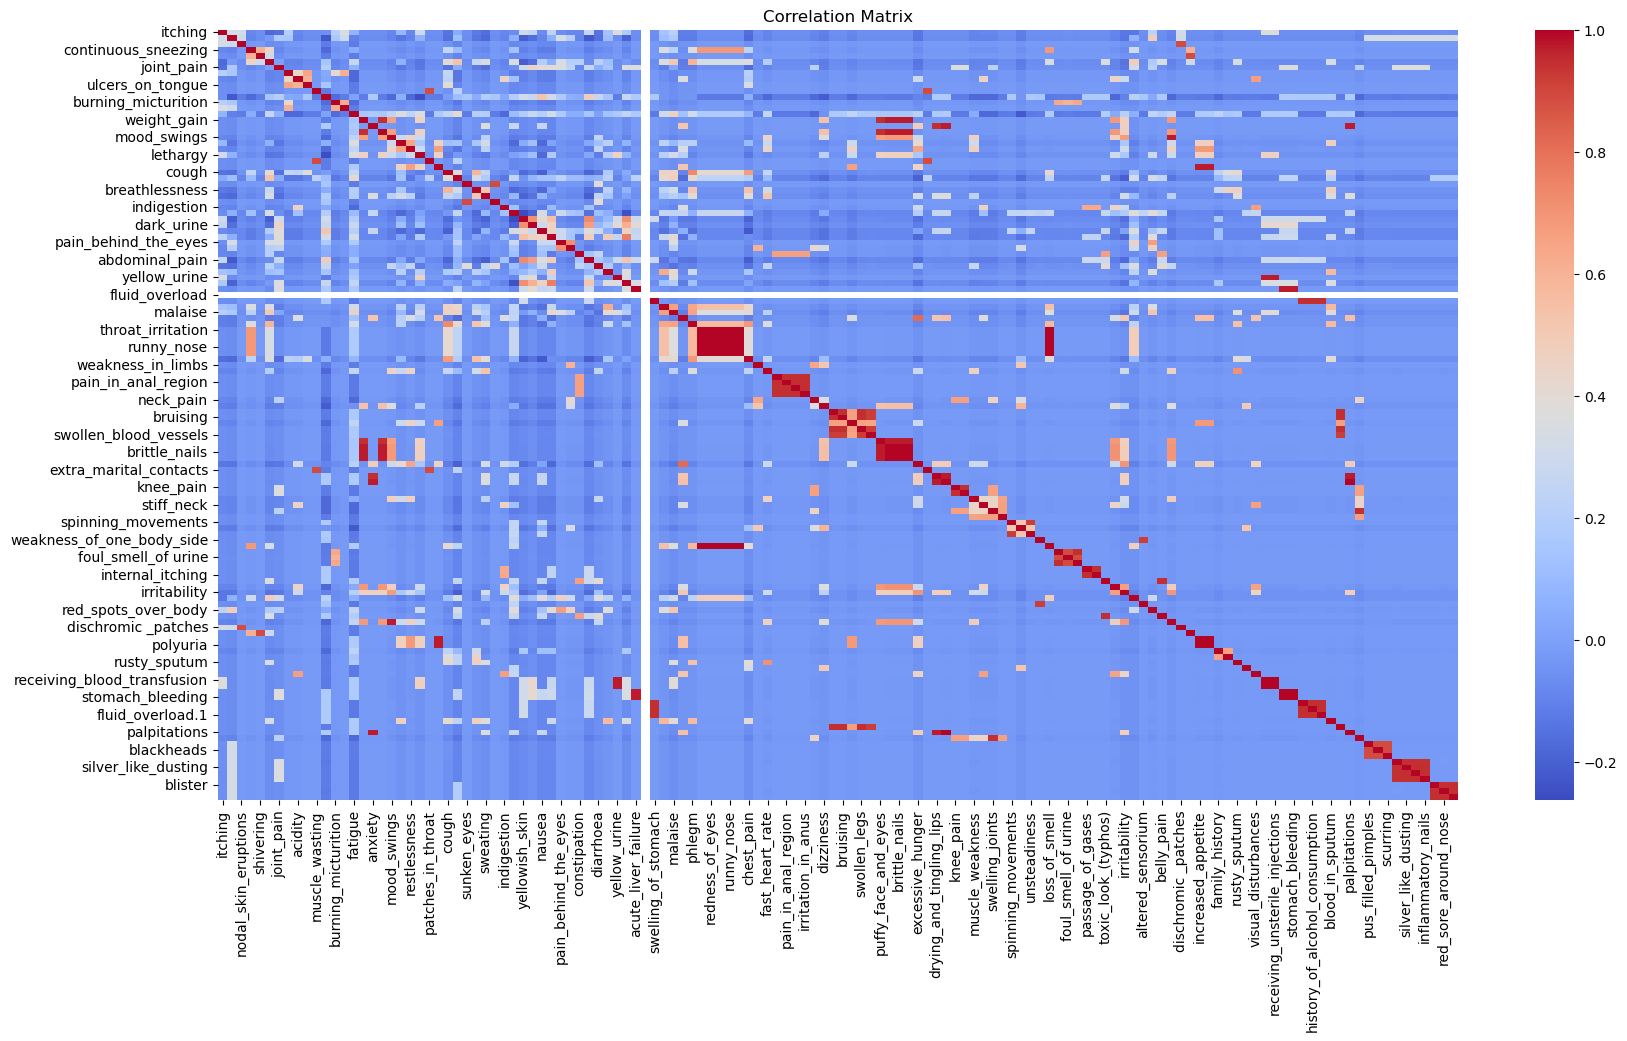

In [8]:
# Correlation Matrix of Features
plt.figure(figsize=(20, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


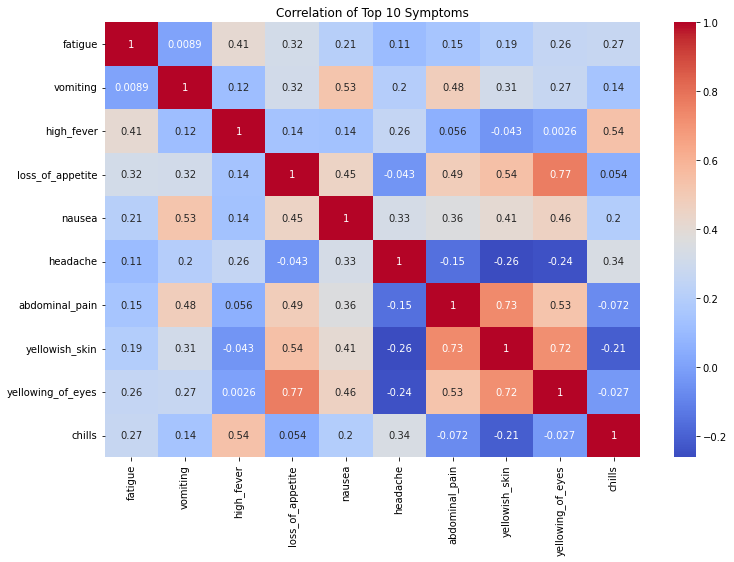

In [23]:
# Heatmap of Top 10 Symptoms Correlation with Each Other
plt.figure(figsize=(12, 8))
top_symptoms_correlation = df[top_symptoms.index].corr()
sns.heatmap(top_symptoms_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation of Top 10 Symptoms')
plt.show()


## ML Model Training 

In [9]:
# Load the data
data = pd.read_csv('disease.csv')  # Replace 'your_data.csv' with the actual file path

# Check the first few rows to understand the structure
print(data.head())

# Preprocessing
# Check for missing values
print(data.isnull().sum())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [10]:
# Encode categorical target variable if necessary
# Assuming 'prognosis' is a categorical variable, convert it to numeric codes
data['prognosis'], unique_prognosis = pd.factorize(data['prognosis'])



In [11]:
# Create a mapping from numerical codes to original prognosis labels
prognosis_mapping = {index: label for index, label in enumerate(unique_prognosis)}
print("Prognosis Mapping:", prognosis_mapping)  # Print the mapping to ensure it is correct

# Split the data into features and target
X = data.drop('prognosis', axis=1)  # Features
y = data['prognosis']  # Target



Prognosis Mapping: {0: 'Fungal infection', 1: 'Allergy', 2: 'GERD', 3: 'Chronic cholestasis', 4: 'Drug Reaction', 5: 'Peptic ulcer diseae', 6: 'AIDS', 7: 'Diabetes ', 8: 'Gastroenteritis', 9: 'Bronchial Asthma', 10: 'Hypertension ', 11: 'Migraine', 12: 'Cervical spondylosis', 13: 'Paralysis (brain hemorrhage)', 14: 'Jaundice', 15: 'Malaria', 16: 'Chicken pox', 17: 'Dengue', 18: 'Typhoid', 19: 'hepatitis A', 20: 'Hepatitis B', 21: 'Hepatitis C', 22: 'Hepatitis D', 23: 'Hepatitis E', 24: 'Alcoholic hepatitis', 25: 'Tuberculosis', 26: 'Common Cold', 27: 'Pneumonia', 28: 'Dimorphic hemmorhoids(piles)', 29: 'Heart attack', 30: 'Varicose veins', 31: 'Hypothyroidism', 32: 'Hyperthyroidism', 33: 'Hypoglycemia', 34: 'Osteoarthristis', 35: 'Arthritis', 36: '(vertigo) Paroymsal  Positional Vertigo', 37: 'Acne', 38: 'Urinary tract infection', 39: 'Psoriasis', 40: 'Impetigo'}


In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [13]:
# Evaluate the model
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))



Accuracy: 1.0
Confusion Matrix:
 [[23  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 28]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        24
          13       1.00      1

In [14]:
# Save the trained model to a file
joblib.dump(model, 'disease_prediction_model.pkl')

# Load the model (for demonstration purposes)
model = joblib.load('disease_prediction_model.pkl')


In [15]:

# Predict on a random sample from the test set
random_sample = X_test.sample(1, random_state=42)
prediction = model.predict(random_sample)



In [16]:
# Decode the predicted value using the mapping
predicted_prognosis = prediction[0]
decoded_prognosis = prognosis_mapping.get(predicted_prognosis, "Unknown Prognosis")  # Use .get() to safely retrieve the label

# Display the random sample and the decoded prediction
print("Random Sample:\n", random_sample)
print("Predicted Prognosis (encoded):", predicted_prognosis)
print("Predicted Prognosis (decoded):", decoded_prognosis)


Random Sample:
      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
239        0          0                     0                    0          0   

     chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
239       0           1             0        0                 0  ...   

     pus_filled_pimples  blackheads  scurring  skin_peeling  \
239                   0           0         0             0   

     silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
239                    0                     0                   0        0   

     red_sore_around_nose  yellow_crust_ooze  
239                     0                  0  

[1 rows x 132 columns]
Predicted Prognosis (encoded): 23
Predicted Prognosis (decoded): Hepatitis E


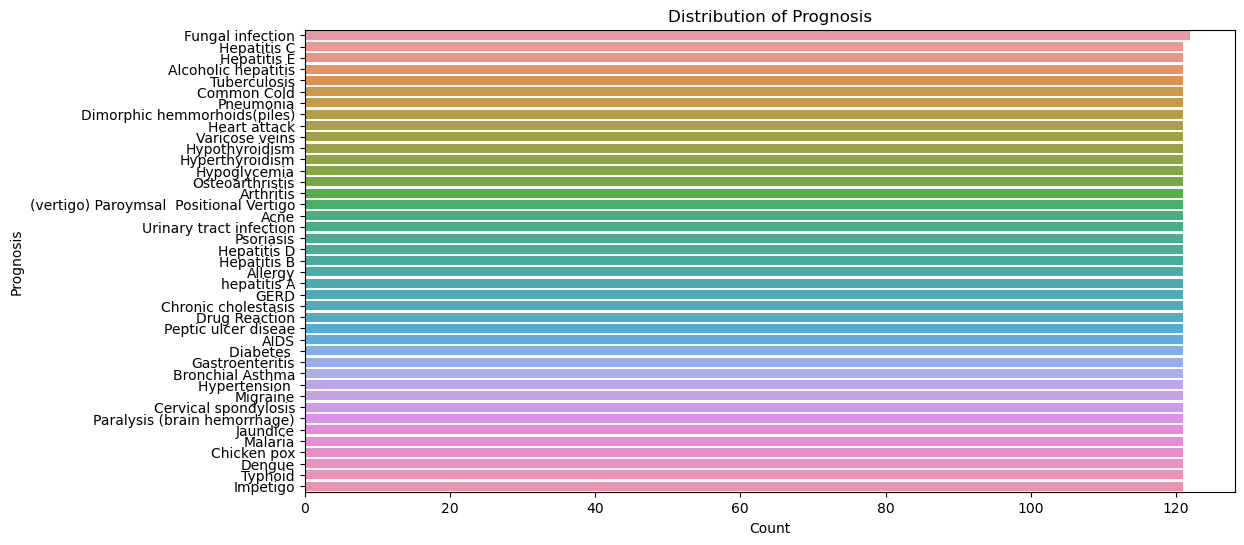

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the prognosis column
plt.figure(figsize=(12, 6))
sns.countplot(y='prognosis', data=df, order=df['prognosis'].value_counts().index)
plt.title('Distribution of Prognosis')
plt.xlabel('Count')
plt.ylabel('Prognosis')
plt.show()

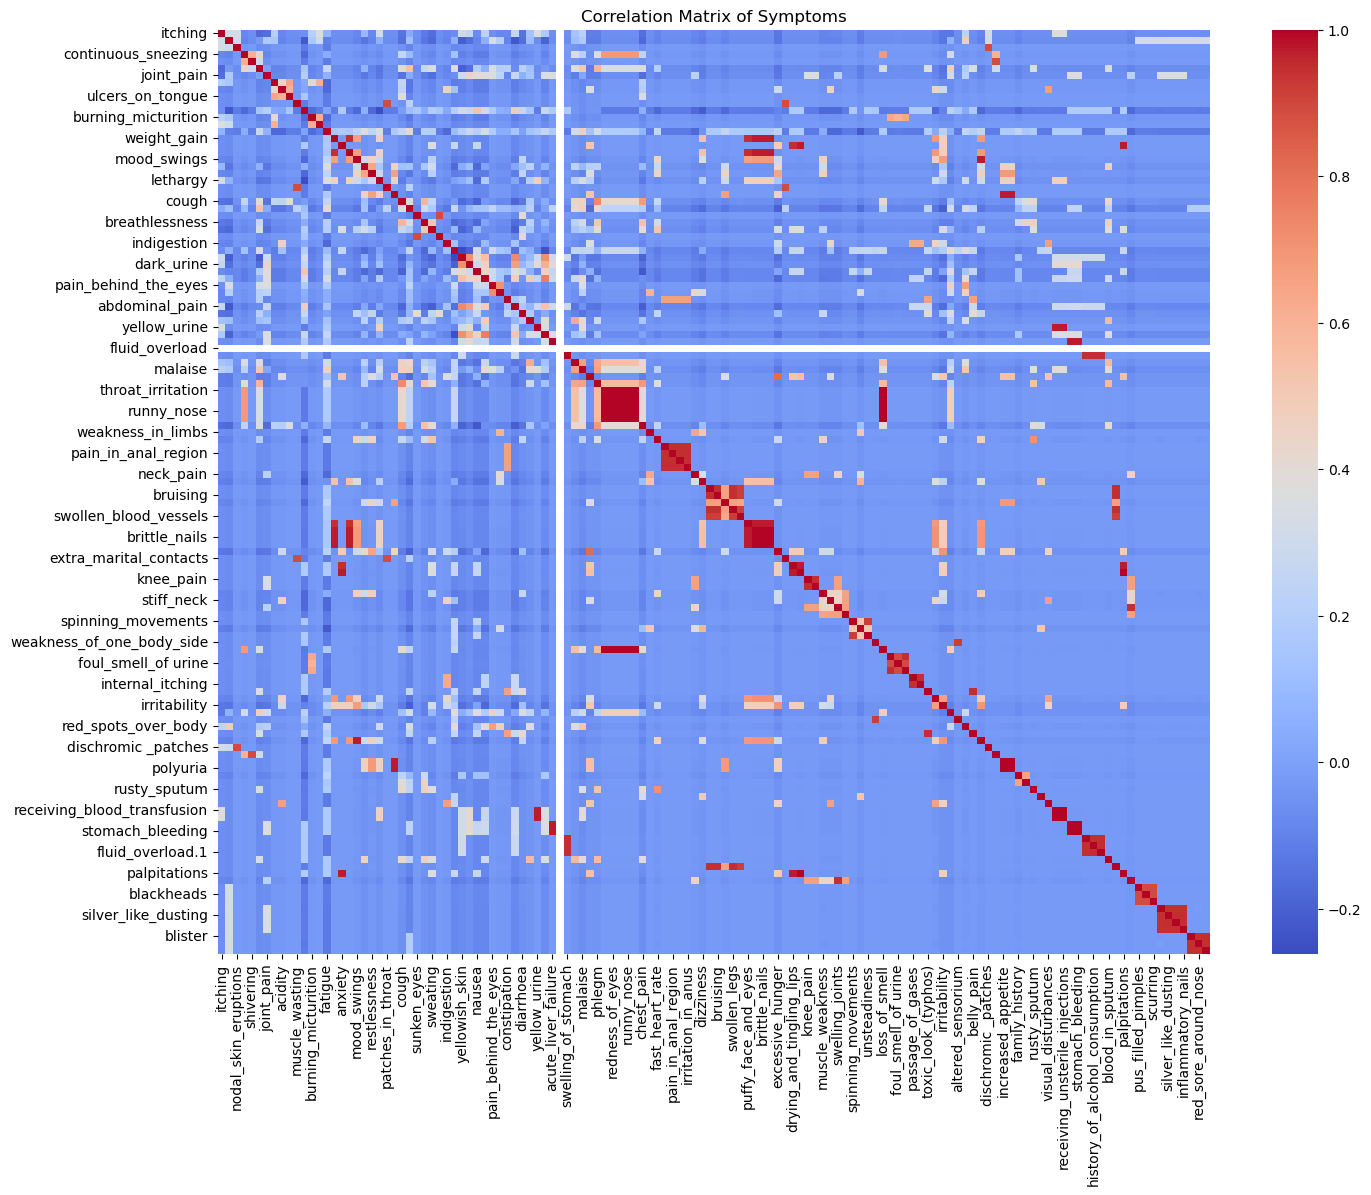

In [18]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix of Symptoms')
plt.show()

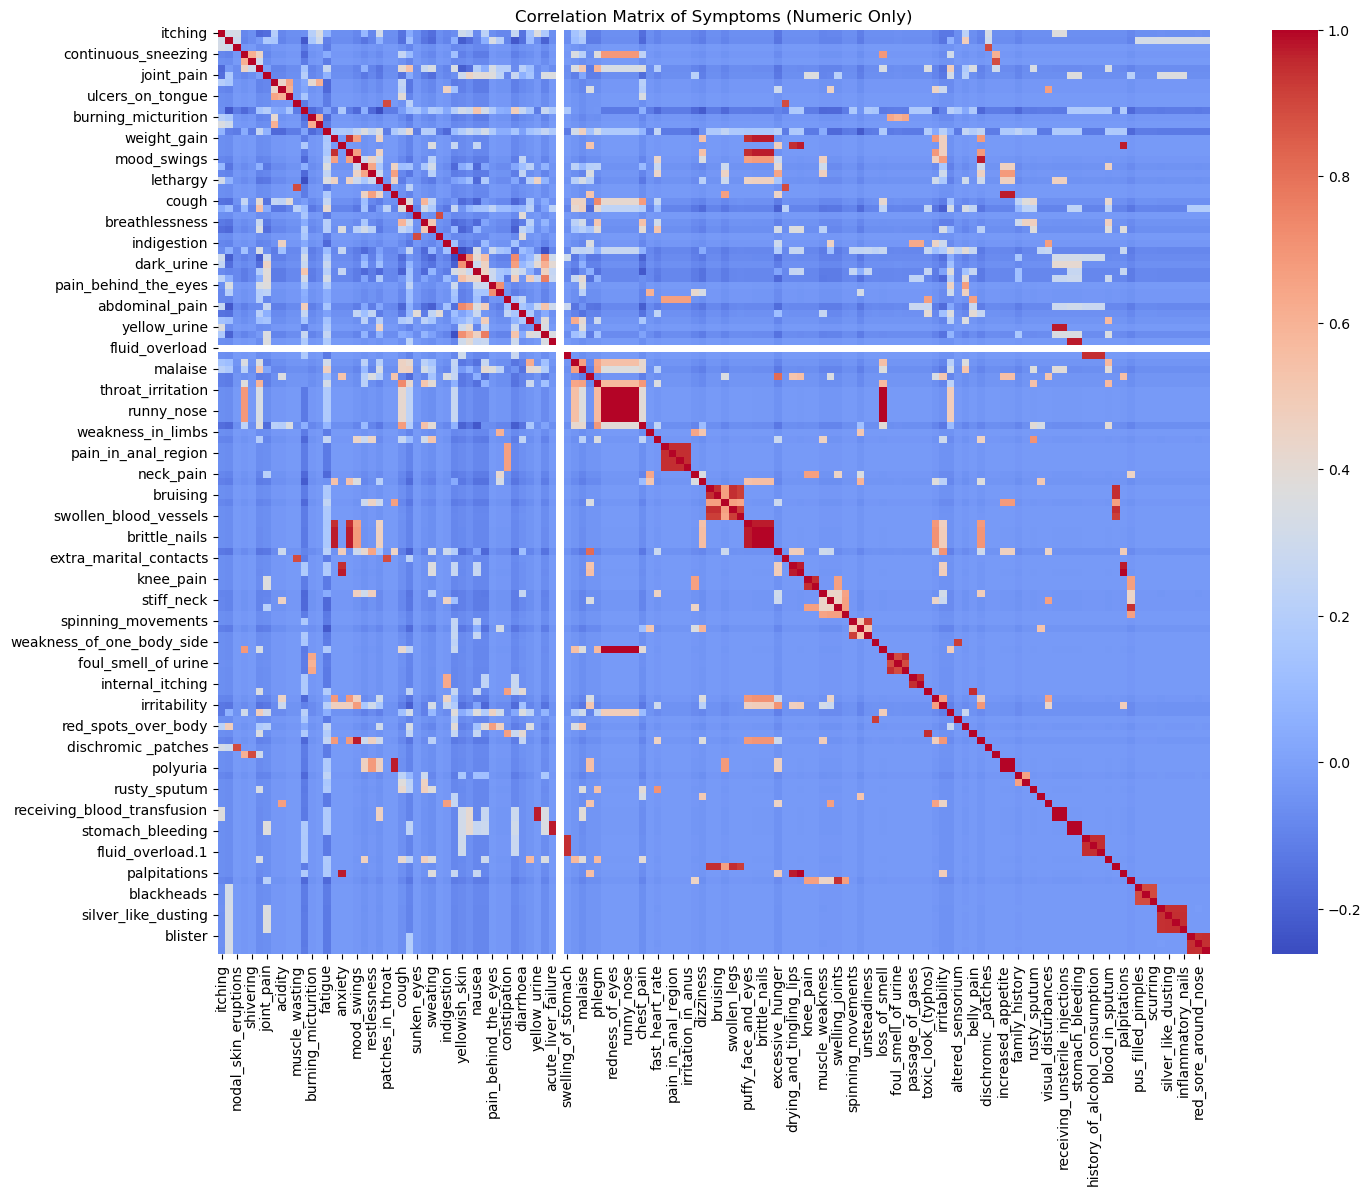

In [19]:
# Filter the dataframe to include only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix of Symptoms (Numeric Only)')
plt.show()

                                 prognosis  itching  skin_rash  \
0  (vertigo) Paroymsal  Positional Vertigo      0.0   0.000000   
1                                     AIDS      0.0   0.000000   
2                                     Acne      0.0   0.950413   
3                      Alcoholic hepatitis      0.0   0.000000   
4                                  Allergy      0.0   0.000000   

   nodal_skin_eruptions  continuous_sneezing  shivering    chills  joint_pain  \
0                   0.0             0.000000   0.000000  0.000000         0.0   
1                   0.0             0.000000   0.000000  0.000000         0.0   
2                   0.0             0.000000   0.000000  0.000000         0.0   
3                   0.0             0.000000   0.000000  0.000000         0.0   
4                   0.0             0.900826   0.900826  0.900826         0.0   

   stomach_pain  acidity  ...  pus_filled_pimples  blackheads  scurring  \
0           0.0      0.0  ...            

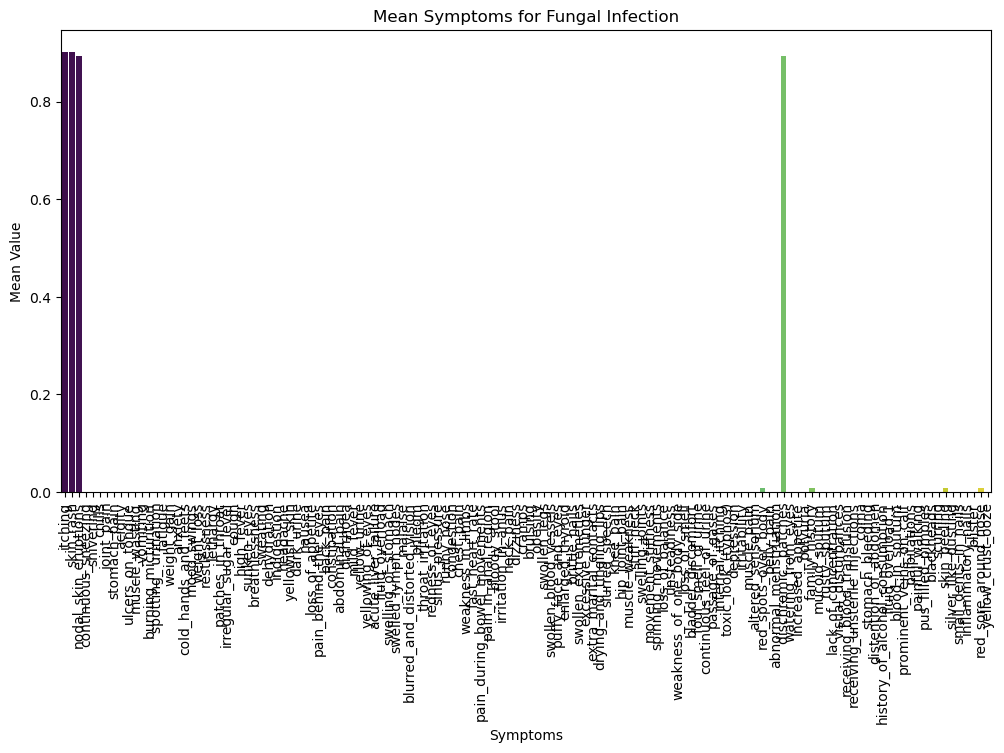

In [21]:
# Group by prognosis and calculate the mean of symptoms for each disease
prognosis_symptom_means = df.groupby('prognosis').mean().reset_index()

# Display the mean symptoms for each prognosis
print(prognosis_symptom_means.head())

# Select a specific prognosis to visualize
selected_prognosis = prognosis_symptom_means[prognosis_symptom_means['prognosis'] == 'Fungal infection']

# Plot the mean symptoms for the selected prognosis
plt.figure(figsize=(12, 6))
sns.barplot(x=selected_prognosis.columns[1:], y=selected_prognosis.iloc[0, 1:], palette='viridis')
plt.title('Mean Symptoms for Fungal Infection')
plt.xlabel('Symptoms')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)
plt.show()

In [22]:
import ipywidgets as widgets
from IPython.display import display

# Create widgets for inputting symptoms
symptom_widgets = {col: widgets.Checkbox(description=col, value=False) for col in X.columns}

# Button to make predictions
predict_button = widgets.Button(description='Predict Disease')

# Output widget to display the prediction
output = widgets.Output()

# Function to make predictions based on input symptoms
def predict_disease(b):
    # Collect input symptoms
    input_data = [int(symptom_widgets[col].value) for col in X.columns]
    input_df = pd.DataFrame([input_data], columns=X.columns)
    
    # Make prediction
    prediction = rf_classifier.predict(input_df)
    predicted_disease = label_encoder.inverse_transform(prediction)[0]
    
    # Display the prediction
    with output:
        output.clear_output()
        print('Predicted Disease:', predicted_disease)

# Set up the button click event
predict_button.on_click(predict_disease)

# Display the widgets
widgets_box = widgets.VBox(list(symptom_widgets.values()) + [predict_button, output])
display(widgets_box)

NameError: name 'rf_classifier' is not defined

NameError: name 'rf_classifier' is not defined